<br>
<center>
<font size="+6"><b>Group 3 Project</b></font><br><br>
<font size="+3"><b>Music Imagery Information Retrieval</b></font><br>
</center>

<br><br>

- Students: *Elias Düker, Leon Grund, Jakob Prager, Veronika Pressler*
- Course: *Neuroinformatics: Machine Learning for Neuronal Data Analysis (2022W)*
- Deadline: *January 26, 2023*

<br>

**Abstract summary.**
...

<br>

**Table of contents.**
1. [Raw data](#data)
2. [Preprocessing](#preprocessing)
3. [Classifier](#classifier)
4. [Experiments](#experiments)
5. [Results](#results)

<br>

**Requirements.**
Please make sure that all 10 `fif` files<sup>1</sup> can be found in a folder `data` in the same directory as this notebook, i.e.
```
project/
│   readme.md
│   this_notebook.ipynb
│
└───data/
        P01-raw.fif
        P04-raw.fif
        ...
        P14-raw.fif
```

<sub><sup>1</sup>You can download the raw files here: http://bmi.ssc.uwo.ca/OpenMIIR-RawEEG_v1/.</sub>

In [4]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
%matplotlib inline

# mne
import mne
from mne.preprocessing import ICA, read_ica
from mne.decoding import CSP, UnsupervisedSpatialFilter

# sklearn
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

In [5]:
print('python:', sys.version.split()[0])
print('numpy:', np.__version__)
print('matplotlib:', matplotlib.__version__)
print('sklearn:', sklearn.__version__)
print('mne:', mne.__version__)
print('seaborn:', sns.__version__)

python: 3.8.3
numpy: 1.18.5
matplotlib: 3.2.2
sklearn: 0.23.1
mne: 1.2.3
seaborn: 0.10.1


<div class="alert alert-block alert-info">Question: Can we put everything together in one class or should we execute the code cell by cell?</div>

In [6]:
class MusicImageryInformationRetrieval:
    
    def __init__(self, data_folder='data/'):
        # initialize folder structure and import files
        self.data_folder = data_folder
        self.raw_file = [f for f in os.listdir(data_folder) if f.endswith('.fif')]
        assert len(self.raw_file) > 0, f'You need at least one fif-file in the folder "{data_folder}".'
        
    
    def preprocess_data(self):
        pass
    
    def load_data_and_labels(self):
        pass
    
    def train_func(self, X_train, y_train):
        pass
    
    def decision_func(self, clf, X_test):
        pass
    
    def run_pipeline(self, data_list, event_labels):
        pass
    
    def print_results(self):
        pass
    
    def confusion_matrix(self):
        pass
    
    def plot_raw_data(self):
        pass
    
    def plot_preprocessed_data(self):
        pass

In [7]:
x = MusicImageryInformationRetrieval()

x.raw_file

['P01-raw.fif',
 'P04-raw.fif',
 'P05-raw.fif',
 'P06-raw.fif',
 'P07-raw.fif',
 'P09-raw.fif',
 'P11-raw.fif',
 'P12-raw.fif',
 'P13-raw.fif',
 'P14-raw.fif']

<a id="data"></a>
# 1. Raw data

Below we show an example how to load and illustrate the raw EEG data for subject `P01`.

In [8]:
# subjects = ['P01','P04','P05','P06','P07','P09','P10','P11','P12','P13','P14']

raw = mne.io.read_raw_fif('data/P01-raw.fif', verbose=0)
raw.info

<Info | 11 non-empty values
 bads: 3 items (P8, P10, T8)
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 64 EEG, 4 EOG, 1 Stimulus
 custom_ref_applied: False
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 104.0 Hz
 meas_date: 2015-01-28 17:39:57 UTC
 meas_id: 4 items (dict)
 nchan: 69
 projs: Average EEG reference: off
 sfreq: 512.0 Hz
>

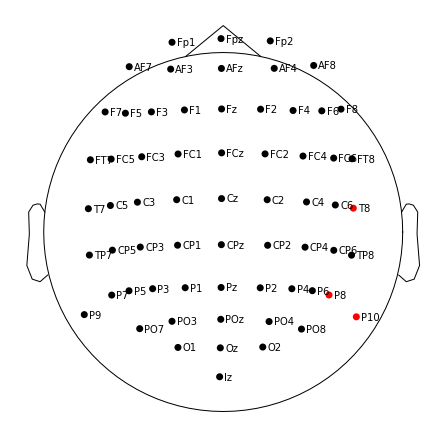

In [9]:
# set montage
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage, on_missing='ignore')

# plot topomap of sensors
raw.plot_sensors(kind='topomap', show_names=True, to_sphere=True);

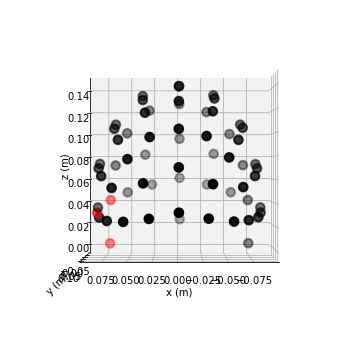

In [10]:
raw.plot_sensors(kind='3d');

Using matplotlib as 2D backend.


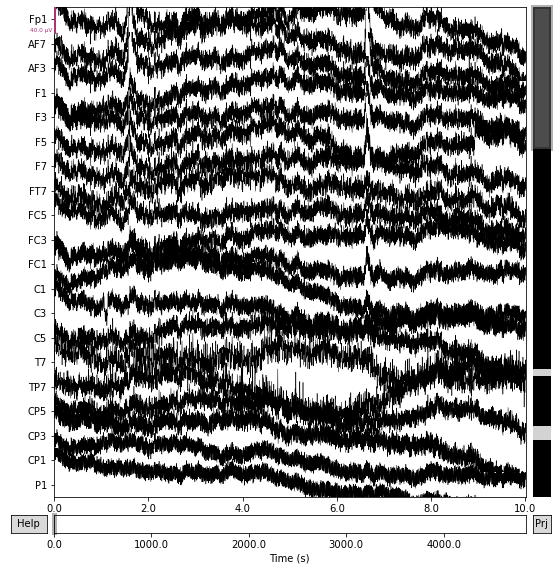

In [11]:
raw.plot();

Removing projector <Projection | Average EEG reference, active : True, n_channels : 64>


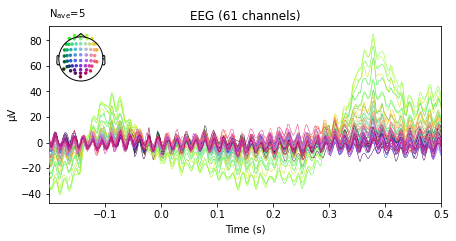

Removing projector <Projection | Average EEG reference, active : True, n_channels : 64>


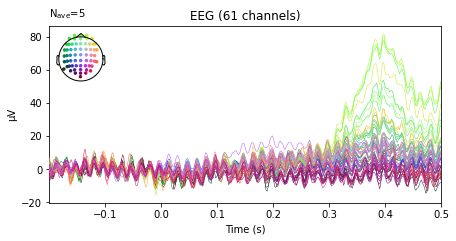

Removing projector <Projection | Average EEG reference, active : True, n_channels : 64>


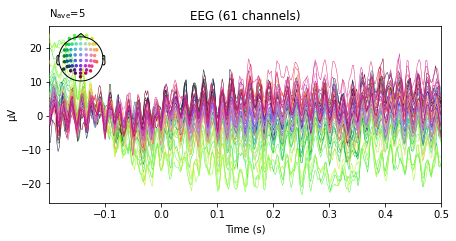

Removing projector <Projection | Average EEG reference, active : True, n_channels : 64>


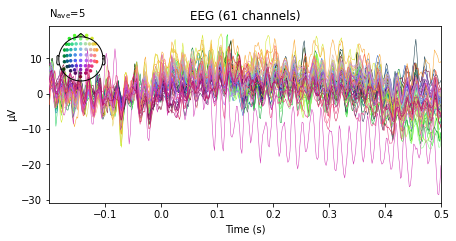

In [12]:
# for i, sub in enumerate(['P01','P04','P05','P06','P07','P09','P11','P12','P13','P14']):
#     raw = mne.io.read_raw_fif(f'data/{sub}-raw.fif', verbose=0)
#     events = mne.find_events(raw, stim_channel='STI 014', verbose=0)
#     for c in [1, 2, 3, 4]:
#         fig = mne.Epochs(raw, events=events, verbose=0)[f'1{c}'].average().plot();
#         fig.savefig(f'figures/{sub}_1{c}.png')

events = mne.find_events(raw, stim_channel='STI 014', verbose=0)
for c in [1, 2, 3, 4]:
    mne.Epochs(raw, events=events, verbose=0)[f'1{c}'].average().plot();

<ipython-input-14-09dace75f4b1>:4: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  fig = mne.viz.plot_events(trial_events, raw.info['sfreq'], raw.first_samp, axes=axes)


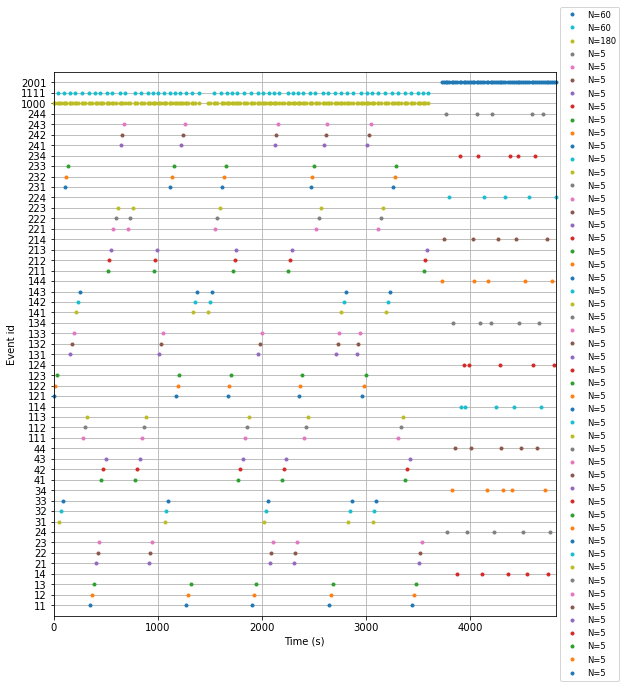

In [14]:
plt.figure(figsize=(10, 10))
axes = plt.gca()
trial_events = mne.find_events(raw, stim_channel='STI 014', shortest_event=0, verbose=0)
fig = mne.viz.plot_events(trial_events, raw.info['sfreq'], raw.first_samp, axes=axes)

<a id="preprocessing"></a>
# 2. Preprocessing

The function `preprocess_raw_data` takes care of all preprocessing steps such as band-pass filtering, ICA with EOG detection, and averaging. 

<font color="red"></font>

<div class="alert alert-block alert-danger">Todo: ICA did not work. Should we still use EOD to remove bad channels somehow? And we should use correct montage from deeptought repo...</div>

For reproducibility, we decided to always use the middle (i.e. third) event as the test set.

In [125]:
def store_preprocessed_data(subjects=['P01','P04','P05','P06','P07','P09','P11','P12','P13','P14']):
    for subject in subjects:
        
        # preload data
        data = mne.io.read_raw_fif(f'data/{subject}-raw.fif', preload=True, verbose=0)

        # remove ambiguous channels (e.g. 'EXG5', 'EXG6', ...)
        ch_names = data.info['ch_names']
        ch_types = data.get_channel_types()
        drop_channels = []
        for name, typ in zip(ch_names, ch_types):
            if name.startswith('EXG') and typ == 'eeg':
                drop_channels.append(name)
        data.drop_channels(ch_names=drop_channels)

        # set montage
        montage = mne.channels.make_standard_montage('standard_1020')
        data.set_montage(montage, on_missing='ignore', verbose=0)

        # interpolate bad channels
        data.interpolate_bads(reset_bads=True, verbose=0)

        # apply bandpass-filtering between 1 and 40 Hz
        data.filter(l_freq=1., h_freq=40., verbose=0)

        # downsampling to 64 Hz
        data.resample(64., npad='auto', verbose=0)

        # averaging
        data.set_eeg_reference(ref_channels='average', verbose=0)

        # chunk data by events
        events = mne.find_events(data, shortest_event=1, stim_channel='STI 014', verbose=0)
        epochs = mne.Epochs(data, events=events, picks='eeg', tmin=-0.1, tmax=2., verbose=0)

        # get data and events
        x = epochs.get_data()
        y = epochs.events[:, 2]

        # combine previous event and 1000 events, e.g. if y=[121,1000,122,1000] then y_new=[121,1121,122,1122]
        y = np.where(y == 1000, 1000 + np.roll(y, shift=1), y)
        
        # save data and labels in .npy file per subject
        with open(f'data/{subject}-preprocessed.npy', 'wb') as f:
            np.save(f, x)
            np.save(f, y)

    return None

In [126]:
# store preprocessed data for each participant
store_preprocessed_data()

Removing projector <Projection | Average EEG reference, active : False, n_channels : 64>


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    3.9s finished


Using data from preloaded Raw for 506 events and 135 original time points ...
0 bad epochs dropped
Removing projector <Projection | Average EEG reference, active : False, n_channels : 64>


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    4.2s finished


Using data from preloaded Raw for 516 events and 135 original time points ...
0 bad epochs dropped
Removing projector <Projection | Average EEG reference, active : False, n_channels : 64>


<ipython-input-125-5f149fd15c37>:21: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  data.interpolate_bads(reset_bads=True, verbose=0)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    4.0s finished


Using data from preloaded Raw for 515 events and 135 original time points ...
0 bad epochs dropped
Removing projector <Projection | Average EEG reference, active : False, n_channels : 64>


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    4.0s finished


Using data from preloaded Raw for 540 events and 135 original time points ...
0 bad epochs dropped
Removing projector <Projection | Average EEG reference, active : False, n_channels : 64>


<ipython-input-125-5f149fd15c37>:21: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  data.interpolate_bads(reset_bads=True, verbose=0)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    4.2s finished


Using data from preloaded Raw for 510 events and 135 original time points ...
0 bad epochs dropped
Removing projector <Projection | Average EEG reference, active : False, n_channels : 66>


<ipython-input-125-5f149fd15c37>:21: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  data.interpolate_bads(reset_bads=True, verbose=0)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    4.7s finished


Using data from preloaded Raw for 509 events and 135 original time points ...
0 bad epochs dropped
Removing projector <Projection | Average EEG reference, active : False, n_channels : 66>


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    4.4s finished


Using data from preloaded Raw for 506 events and 135 original time points ...
0 bad epochs dropped
Removing projector <Projection | Average EEG reference, active : False, n_channels : 66>


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    4.3s finished


Using data from preloaded Raw for 510 events and 135 original time points ...
0 bad epochs dropped
Removing projector <Projection | Average EEG reference, active : False, n_channels : 66>


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    4.0s finished


Using data from preloaded Raw for 510 events and 135 original time points ...
0 bad epochs dropped
Removing projector <Projection | Average EEG reference, active : False, n_channels : 66>


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    4.1s finished


Using data from preloaded Raw for 504 events and 135 original time points ...
0 bad epochs dropped


In [71]:
def load_preprocessed_data(subjects=None, event_encodings=None):
    xs, ys = [], []
    
    if not subjects:
        subjects = ['P01','P04','P05','P06','P07','P09','P11','P12','P13','P14']
    
    for subject in subjects:

        # load preprocessed data
        with open(f'data/{subject}-preprocessed.npy', 'rb') as f:
            x = np.load(f)
            y = np.load(f)
        
        # translate events into class labels
        if event_encodings:
            y = np.array([event_encodings.get(e) for e in y]).copy()

            # find indices for mapped labels
            labels = list(set(event_encodings.values()))
            idx = np.where(np.isin(y, labels))
        else:
            idx = np.where(y == y)
            
        # append labelled data
        xs.append(x[idx].copy())
        ys.append(y[idx].copy())
        
        # delete x, y
        del x, y
        
    return np.concatenate(xs), np.concatenate(ys)

<a id="methods"></a>
# 3. Methods

The implementation is similar to our programming assignment with functions `train_func`, `decision_func`. In addition, I've collected the steps to produce the labelled dataset for different event_id mappings in the function `get_labelled_dataset`. Finally, the `run_pipeline` function applies `CSP`, `StandardScaler` and `LDA` classifier.

<font color="red">We should try different classifiers as I didn't get very good results with `LDA` so far...</font>

If time permits, we could try to use `CNN` or `RNN` models, which worked quite well on similar tasks, see [Silent EEG-Speech Recognition Using Convolutional and Recurrent Neural Network with 85% Accuracy of 9 Words Classification](https://pubmed.ncbi.nlm.nih.gov/34695956/).

In [ ]:
# clf1 = Pipeline(steps=[
#     ("PCA", UnsupervisedSpatialFilter(PCA(10), average=False)),
#     ("CSP", CSP(n_components=10, reg='ledoit_wolf', log=True)),
#     ("scaler", StandardScaler()),
#     ("model", SVC())])

# clf2 = Pipeline(steps=[
#     ("PCA", UnsupervisedSpatialFilter(PCA(), average=False)),
#     ("CSP", CSP()),
#     ("scaler", StandardScaler()),
#     ("model", LinearDiscriminantAnalysis())])

# clf3 = Pipeline(steps=[
#     ("CSP", CSP(n_components=10, reg='ledoit_wolf', log=True)),
#     ("scaler", StandardScaler()),
#     ("model", LinearDiscriminantAnalysis())])

In [127]:
def train_func(X_train, y_train):
    clf = Pipeline(steps=[
        ("PCA", UnsupervisedSpatialFilter(PCA(10), average=False)),
        ("CSP", CSP(n_components=10, reg='ledoit_wolf', log=True)),
        ("scaler", StandardScaler()),
        ("model", LinearDiscriminantAnalysis())]) 
    clf.fit(X_train, y_train)
    return clf

In [128]:
def run_pipeline(subjects, event_encodings):
    X_all, y_all = load_preprocessed_data(subjects=subjects, event_encodings=event_encodings)
    
    split_obj = StratifiedKFold(n_splits=10, shuffle=True, random_state=1234)

    acc = []
    cm = []
    
    for train_index, test_index in split_obj.split(X_all, y_all):
        # get train-test split
        X_train, X_test = X_all[train_index], X_all[test_index]
        y_train, y_test = y_all[train_index], y_all[test_index]
        
        # train classifier
        clf = train_func(X_train, y_train)

        # predict labels
        y_pred = clf.predict(X_test)

        # append accuracy for this fold
        acc.append(accuracy_score(y_test, y_pred))

        # append confusion matrix for this fold    
        cm_labels = np.unique(y_test)
        cm_array = confusion_matrix(y_test, y_pred)
        cm_df = pd.DataFrame(cm_array, index=cm_labels, columns=cm_labels)
        cm.append(cm_df)
        
    return acc, cm

<a id="results"></a>
# 4. Results

The event markers recorded in the raw EEG comprise:
- Trial labels (as a concatenation of stimulus ID and condition) at the beginning of each trial
- Exact audio onsets for the first cue click of each trial in conditions 1 and 2 (detected by the Stimtracker)
- Subject feedback for the condition 4 trials (separate event IDs for positive and negative feedback)


For example, the event "imagining Chim Chim Cheree with lyrics and cue clicks" would be 12, since
- songs with lyrics belong the the `0`th group
- Chim Chim Cheree is the `1`st song in the group
- imagining with cue clicks is condition `2`

$\Rightarrow$ `012` = 12.

In [129]:
GROUPS = [0, 1, 2]
SONGS = [1, 2, 3, 4]
CONDS = [1, 2, 3, 4]

In [153]:
# perception vs imagination with cue (balanced)
class1 = [int(f'{g}{s}{c}') for g in GROUPS for s in SONGS for c in [1]]
class2 = [int(f'{g}{s}{c}') for g in GROUPS for s in SONGS for c in [2]]
class3 = [int(f'{g}{s}{c}') for g in GROUPS for s in SONGS for c in [3]]
class4 = [int(f'{g}{s}{c}') for g in GROUPS for s in SONGS for c in [4]]

mapping = {}
mapping.update({event_id: 'c1: perception' for event_id in class1})
mapping.update({event_id: 'c2: imagination' for event_id in class2})
mapping.update({event_id: 'c3: imagination w/o cue' for event_id in class3})
mapping.update({event_id: 'c4: imagination feedback' for event_id in class4})

In [154]:
acc, cm = run_pipeline(subjects=['P01'], event_encodings=mapping)

Computing rank from data with rank=None
    Using tolerance 2.1e-05 (2.2e-16 eps * 10 dim * 9.6e+09  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 1.9e-05 (2.2e-16 eps * 10 dim * 8.5e+09  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 9.2e-06 (2.2e-16 eps * 10 dim * 4.2e+09  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 7.7e-06 (2.2e-16 eps * 10 dim * 3.5e+09  max singular v

Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 1.9e-05 (2.2e-16 eps * 10 dim * 8.7e+09  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 1.9e-05 (2.2e-16 eps * 10 dim * 8.4e+09  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 9.3e-06 (2.2e-16 eps * 10 dim * 4.2e+09  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 5.4e-06 (

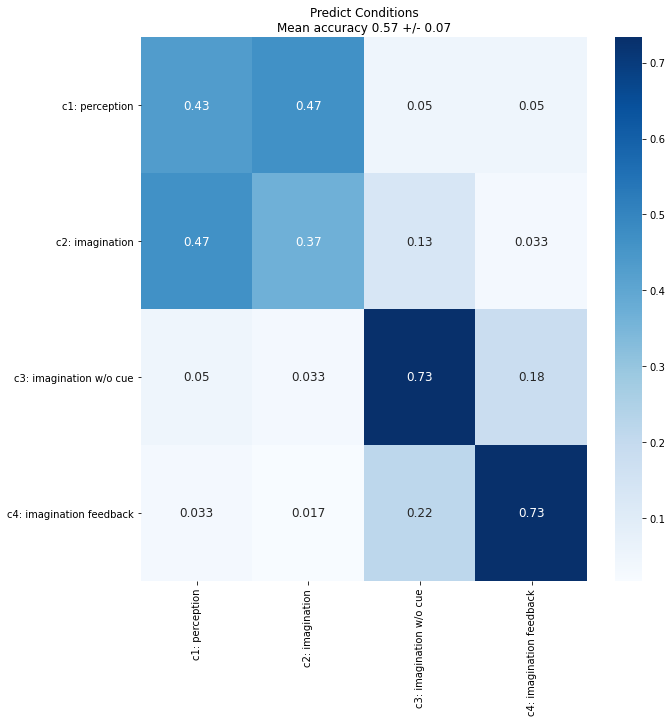

In [155]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(sum(cm) / np.sum(sum(cm), axis=1), annot=True, cmap='Blues', annot_kws={"size": 12})
ax.set_title(f'Predict Conditions\nMean accuracy {np.mean(acc):.2f} +/- {np.std(acc):.2f}')
plt.yticks(rotation=0)
plt.show()

In [156]:
# lyrics vs non-lyrics vs instrumental
class0 = [int(f'{g}{s}{c}') for g in [0] for s in SONGS for c in CONDS]
class1 = [int(f'{g}{s}{c}') for g in [1] for s in SONGS for c in CONDS]
class2 = [int(f'{g}{s}{c}') for g in [2] for s in SONGS for c in CONDS]

mapping = {}
mapping.update({event_id: 'g1: lyrics' for event_id in class0})
mapping.update({event_id: 'g2: non-lyrics' for event_id in class1})
mapping.update({event_id: 'g3: instrumental' for event_id in class2})

In [157]:
acc, cm = run_pipeline(subjects=['P01'], event_encodings=mapping)

Computing rank from data with rank=None
    Using tolerance 2e-05 (2.2e-16 eps * 10 dim * 8.9e+09  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 1.6e-05 (2.2e-16 eps * 10 dim * 7.1e+09  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 1.7e-05 (2.2e-16 eps * 10 dim * 7.6e+09  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 2e-05 (2.2e-16 eps * 10 dim * 8.9e+09  max singular value

Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 1.7e-05 (2.2e-16 eps * 10 dim * 7.8e+09  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 1.6e-05 (2.2e-16 eps * 10 dim * 7.2e+09  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using LEDOIT_WOLF
Done.


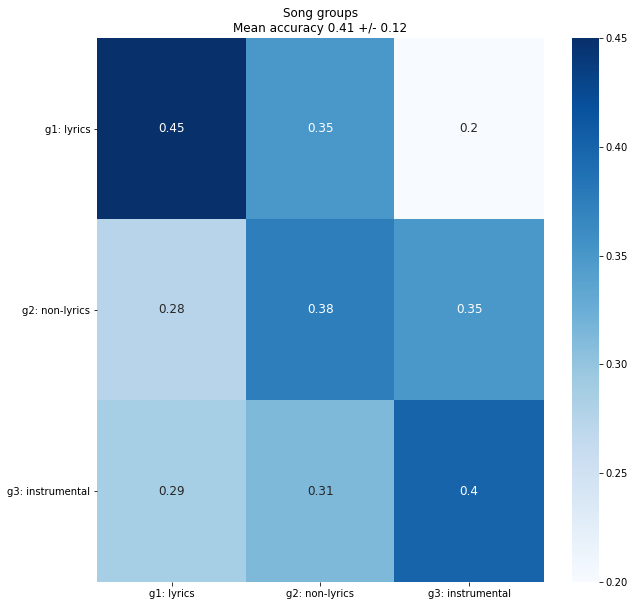

In [158]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(sum(cm) / np.sum(sum(cm), axis=1), annot=True, cmap='Blues', annot_kws={"size": 12})
ax.set_title(f'Song groups\nMean accuracy {np.mean(acc):.2f} +/- {np.std(acc):.2f}')
plt.yticks(rotation=0) 
plt.show()

In [159]:
mapping = {}
mapping.update({event: 'meter: 3/4' for event in [1, 2, 11, 12, 21, 22]})
mapping.update({event: 'meter: 4/4' for event in [3, 4, 13, 14, 23, 24]})

In [160]:
acc, cm = run_pipeline(subjects=['P01'], event_encodings=mapping)

Computing rank from data with rank=None
    Using tolerance 9.9e-06 (2.2e-16 eps * 10 dim * 4.5e+09  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 2.7e-06 (2.2e-16 eps * 10 dim * 1.2e+09  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 1e-05 (2.2e-16 eps * 10 dim * 4.5e+09  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 2.8e-06 (2.2e-16 eps * 10 dim * 1.3e+09  max singular val

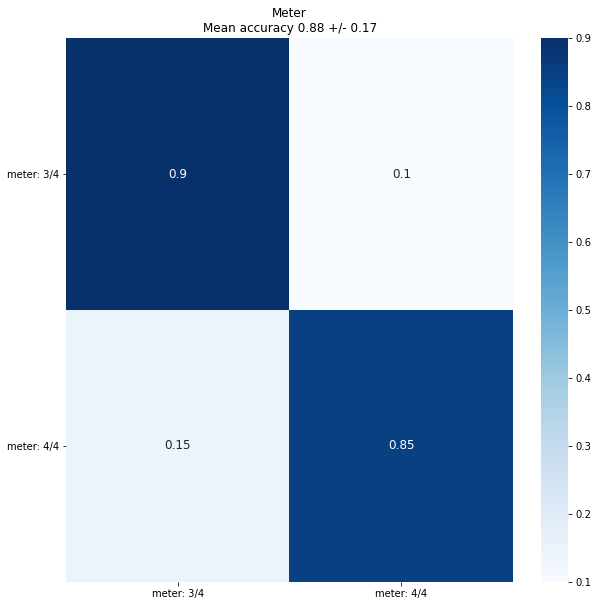

In [161]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(sum(cm) / np.sum(sum(cm), axis=1), annot=True, cmap='Blues', annot_kws={"size": 12})
ax.set_title(f'Meter\nMean accuracy {np.mean(acc):.2f} +/- {np.std(acc):.2f}')
plt.yticks(rotation=0) 
plt.show()

In [174]:
CONDS_1 = [1, 2, 3]
mapping = {}
mapping.update({int(f'01{c}'): 's01: Chim Chim Cheree (lyrics)' for c in CONDS_1})
mapping.update({int(f'02{c}'): 's02: Take Me Out to the Ballgame (lyrics)' for c in CONDS_1})
mapping.update({int(f'03{c}'): 's03: Jingle Bells (lyrics)' for c in CONDS_1})
mapping.update({int(f'04{c}'): 's04: Mary Had a Little Lamb (lyrics)' for c in CONDS_1})
mapping.update({int(f'11{c}'): 's11: Chim Chim Cheree' for c in CONDS_1})
mapping.update({int(f'12{c}'): 's12: Take Me Out to the Ballgame' for c in CONDS_1})
mapping.update({int(f'13{c}'): 's13: Jingle Bells' for c in CONDS_1})
mapping.update({int(f'14{c}'): 's14: Mary Had a Little Lamb' for c in CONDS_1})
mapping.update({int(f'21{c}'): 's21: Emperor Waltz' for c in CONDS_1})
mapping.update({int(f'22{c}'): "s22: Hedwig's Theme (Harry Potter)" for c in CONDS_1})
mapping.update({int(f'23{c}'): 's23: Imperial March (Star Wars Theme)' for c in CONDS_1})
mapping.update({int(f'24{c}'): 's24: Eine Kleine Nachtmusik' for c in CONDS_1})

In [175]:
acc, cm = run_pipeline(subjects=['P01'], event_encodings=mapping)

Computing rank from data with rank=None
    Using tolerance 7.3e-06 (2.2e-16 eps * 10 dim * 3.3e+09  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 6.7e-06 (2.2e-16 eps * 10 dim * 3e+09  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 8.1e-06 (2.2e-16 eps * 10 dim * 3.7e+09  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-05 (2.2e-16 eps * 10 dim * 5.3e+09  max singular val

Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 8.1e-06 (2.2e-16 eps * 10 dim * 3.7e+09  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 5.1e-06 (2.2e-16 eps * 10 dim * 2.3e+09  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 7.1e-06 (2.2e-16 eps * 10 dim * 3.2e+09  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-05 (

Reducing data rank from 10 -> 10
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 5e-06 (2.2e-16 eps * 10 dim * 2.3e+09  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 8.7e-06 (2.2e-16 eps * 10 dim * 3.9e+09  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 10 dim * 4.8e+09  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=Non

Reducing data rank from 10 -> 10
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 6.5e-06 (2.2e-16 eps * 10 dim * 2.9e+09  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 6.3e-06 (2.2e-16 eps * 10 dim * 2.8e+09  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 8.1e-06 (2.2e-16 eps * 10 dim * 3.7e+09  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=N

Reducing data rank from 10 -> 10
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 6.2e-06 (2.2e-16 eps * 10 dim * 2.8e+09  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 5.3e-06 (2.2e-16 eps * 10 dim * 2.4e+09  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 7e-06 (2.2e-16 eps * 10 dim * 3.1e+09  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=Non

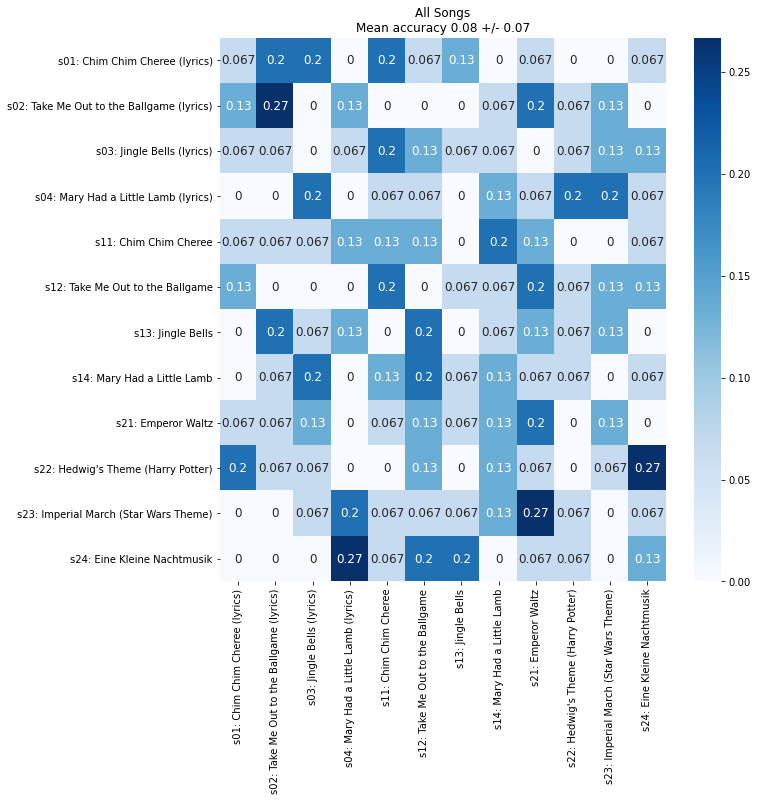

In [176]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(sum(cm) / np.sum(sum(cm), axis=1), annot=True, cmap='Blues', annot_kws={"size": 12})
ax.set_title(f'All Songs\nMean accuracy {np.mean(acc):.2f} +/- {np.std(acc):.2f}')
plt.yticks(rotation=0) 
plt.show()

In [168]:
mapping = {}
mapping.update({int(f'{g}1{c}'): 's1: Chim Chim Cheree' for g in [0, 1] for c in [1, 2]})
mapping.update({int(f'{g}2{c}'): 's2: Take Me Out to the Ballgame' for g in [0, 1] for c in [1, 2]})
mapping.update({int(f'{g}3{c}'): 's3: Jingle Bells' for g in [0, 1] for c in [1, 2]})
mapping.update({int(f'{g}4{c}'): 's4: Mary Had a Little Lamb' for g in [0, 1] for c in [1, 2]})

In [169]:
acc, cm = run_pipeline(subjects=['P01'], event_encodings=mapping)

Computing rank from data with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 10 dim * 5e+09  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 8.5e-06 (2.2e-16 eps * 10 dim * 3.8e+09  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 10 dim * 4.9e+09  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 1.6e-05 (2.2e-16 eps * 10 dim * 7.1e+09  max singular val

Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e-05 (2.2e-16 eps * 10 dim * 4.9e+09  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 8.2e-06 (2.2e-16 eps * 10 dim * 3.7e+09  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 1e-05 (2.2e-16 eps * 10 dim * 4.7e+09  max singular value)
    Estimated rank (mag): 10
    MAG: rank 10 computed from 10 data channels with 0 projectors
Reducing data rank from 10 -> 10
Estimating covariance using LEDOIT_WOLF
Done.
Computing rank from data with rank=None
    Using tolerance 1.6e-05 (2.

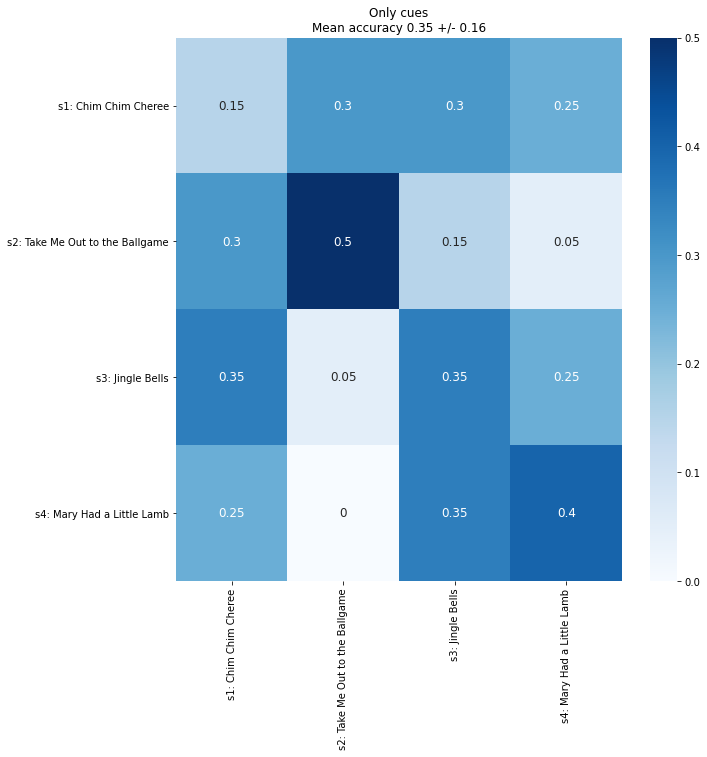

In [170]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(sum(cm) / np.sum(sum(cm), axis=1), annot=True, cmap='Blues', annot_kws={"size": 12})
ax.set_title(f'Only cues\nMean accuracy {np.mean(acc):.2f} +/- {np.std(acc):.2f}')
plt.yticks(rotation=0) 
plt.show()